# Econometria Aplicada

## Aula 4 - Variáveis Instrumentais




João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

## Modelos de probabilidade

**Motivação**: \\

 Como estimar uma curva de demanda? Esta aplicação foi inspirada no texto ["Supply, Demand, and the Instrumental Variable: Lessons for Data Scientists from the Economist’s Toolbox"](https://towardsdatascience.com/supply-demand-and-the-instrumental-variable-lessons-for-data-scientists-from-the-economists-21af225187cd), utiliza dados de Epple e McCallum (2006), e nos exercícios propostos por Glenn Ellison and Stephen Ryan [.Aqui](https://ocw.mit.edu/courses/14-271-industrial-organization-i-fall-2005/pages/assignments/). \
 \

 Epple, D., & McCallum, B. T. (2006). Simultaneous equation econometrics: the missing example. Economic Inquiry, 44(2), 374-384.

### Pacotes

In [18]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(broom) 

### Dados

In [1]:
url <- "https://github.com/costafilhojoao/Teaching/raw/main/Econometria%20Aplicada/Dados/broiler.csv"

download.file(url, "broiler.csv")

In [3]:
dat <- read.csv("broiler.csv")

Veja os primeiros 10 elementos da base de dados:

In [4]:
head( dat, 10 )

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,1960,19.2,9210,52.4,33.5,46.0,51.53361,29.6,4333602,180.671,50,51
2,1961,20.6,9361,47.4,33.0,45.1,51.86824,29.9,4944130,183.691,49,52
3,1962,20.6,9666,50.0,34.2,44.8,52.09133,30.2,4997189,186.538,46,53
4,1963,21.1,9886,49.3,33.8,49.8,50.97588,30.6,5269019,189.242,80,54
5,1964,21.3,10456,48.2,32.8,49.9,50.75279,31.0,5443769,191.889,78,55
6,1965,22.9,10965,49.8,34.4,51.8,50.97588,31.5,5871560,194.303,49,56
7,1966,24.5,11417,52.7,36.2,54.5,52.48173,32.4,6437127,196.560,44,57
8,1967,25.1,11776,48.8,36.4,51.7,51.86824,33.4,6552305,198.712,45,58
9,1968,25.2,12196,51.2,37.9,45.5,49.52580,34.8,6653319,200.706,59,59


Veja os últimos 10 elementos da base de dados:

In [5]:
tail( dat, 5 )

,YEAR,Q,Y,PCHICK,PBEEF,PCOR,PF,CPI,QPRODA,POP,MEATEX,TIME
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
36,1995,48.2,20798,142.2,134.9,109.0,138.4826,152.4,24827130,266.364,1183,86
37,1996,48.8,21072,152.6,134.5,158.5,174.3442,156.9,26123767,269.485,1291,87
38,1997,49.5,21470,158.5,136.8,110.1,157.7798,160.5,27041394,272.756,1443,88
39,1998,49.8,22359,159.6,136.5,91.7,128.9456,163.0,27612361,275.955,1543,89
40,1999,52.9,22678,161.8,139.2,78.2,102.8999,166.6,29741381,279.144,1674,90


Veja a estrutura dos dados:

In [6]:
str( dat ) # estrutura dos dados

'data.frame':	40 obs. of  12 variables:
 $ YEAR  : int  1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 ...
 $ Q     : num  19.2 20.6 20.6 21.1 21.3 22.9 24.5 25.1 25.2 26.3 ...
 $ Y     : int  9210 9361 9666 9886 10456 10965 11417 11776 12196 12451 ...
 $ PCHICK: num  52.4 47.4 50 49.3 48.2 49.8 52.7 48.8 51.2 54.1 ...
 $ PBEEF : num  33.5 33 34.2 33.8 32.8 34.4 36.2 36.4 37.9 41.7 ...
 $ PCOR  : num  46 45.1 44.8 49.8 49.9 51.8 54.5 51.7 45.5 49.3 ...
 $ PF    : num  51.5 51.9 52.1 51 50.8 ...
 $ CPI   : num  29.6 29.9 30.2 30.6 31 31.5 32.4 33.4 34.8 36.7 ...
 $ QPRODA: int  4333602 4944130 4997189 5269019 5443769 5871560 6437127 6552305 6653319 7174882 ...
 $ POP   : num  181 184 187 189 192 ...
 $ MEATEX: int  50 49 46 80 78 49 44 45 59 87 ...
 $ TIME  : int  51 52 53 54 55 56 57 58 59 60 ...


Variáveis:

* YEAR: ano
* Q: quantidade de frango grelhado ('broiled chicken')
* Y: renda disponível real per capita
* PCHICK: Preço do frango grelhado ('broiled chicken')
* PBEEF: preço da carne bovina
* PCOR: preço do milho
* PF: preço da ração do frango
* CPI: índice de inflação ao conumidor
* QPRODUA: quantidade agregada de frango
* POP: população dos EUA
* MEATEX: quantidade exportada de carne bovina, vitela e suína em libras

# Preço vs Quantidade

### Visualização dos dados

Faça um gráfico de dispersão entre a quantidade (Q) e o preço (PCHICK):

In [7]:
library(ggplot2)

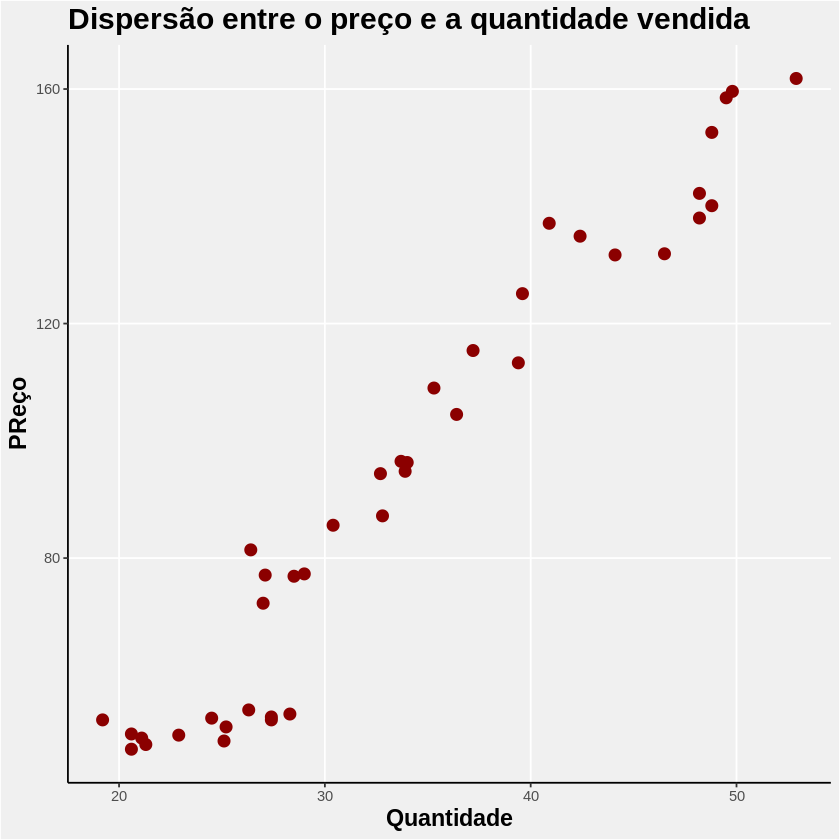

In [10]:
ggplot( dat, aes( x = Q, y = PCHICK ) ) +
  geom_point( color = 'darkred', size = 3 ) + 
  labs(title = "Dispersão entre o preço e a quantidade vendida",
       x = "Quantidade",
       y = "PReço") +
         theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

## Modelo de regressão linear

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ PCHICK \big]_i = \beta_0 + \beta_1 \ln \big[ Q \big]_i + \epsilon_i
\end{equation}



In [12]:
mqo <- lm( log( PCHICK )~ log( Q ) , data = dat )

In [20]:
results <- tidy( mqo )

In [21]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   -0.381    0.237      -1.61 1.17e- 1
2 log(Q)         1.39     0.0679     20.5  3.97e-22


Qual é a conclusão que obtemos? \
Como era de se esperar, o coeficiente foi positivo. O estimador de mínimos quadrados ordinários não é a melhor escolha quando há o problema da endogeneidade das variáveis.

## Modelo de regressão com variáveis instrumentais

### [1] Primeiro estágio



Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ PCHICK \big]_i = \beta_0 + \beta_1 \ln \big[PF \big]_i + \beta_2 \ln \big[ PCOR  \big]_i + v_i.
\end{equation}

In [23]:
iv1 <- lm( log( PCHICK )~ log( PF ) + log( PCOR ) , data = dat )

In [29]:
summary( iv1 )


Call:
lm(formula = log(PCHICK) ~ log(PF) + log(PCOR), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23888 -0.03667  0.00334  0.03797  0.41924 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51817    0.20306   2.552    0.015 *  
log(PF)      1.43543    0.09942  14.438  < 2e-16 ***
log(PCOR)   -0.57406    0.11082  -5.180 8.07e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1075 on 37 degrees of freedom
Multiple R-squared:  0.9396,	Adjusted R-squared:  0.9364 
F-statistic: 287.9 on 2 and 37 DF,  p-value: < 2.2e-16


Será que o instrumento é relevante? \
Como a estatística F é maior do que 10, podemos **rejeitar a hipótese** de que o instrumento **não** é relevante.

Agora, vamos criar uma previsão (o fit do modelo) com base na regressão anterior. Vamos utilizar a função 'predict', na qual criamos uma variável com 'predict( modelo )', onde 'modelo' é o nome do modelo que queremos utilizar (no nosso caso, o modelo anterior).

In [30]:
phat = predict( iv1 ) # para calcular o valor esperado para o preço em cada observação com base na regressão anterior

Adicione a variável acima à base de dados 'dat'.

In [31]:
dat$PHAT <- phat

### [2] Segundo estágio (sem controles)

Vamos estimar a regressão abaixo:

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 \ln \big[ \hat{PCHICK} \big]_i + u_i.
\end{equation}

In [32]:
iv2 <- lm( log( Q )~ log( PHAT ), data = dat )

In [33]:
results <- tidy( iv2 )

In [34]:
print( results )

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   -0.758     0.318     -2.38 2.24e- 2
2 log(PHAT)      2.84      0.213     13.3  6.55e-16


### [3] Segundo estágio (alguns controles): 



\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 \ln \big[ Y \big]_i  + \beta_3 PBEEF_i + \varepsilon_i.
\end{equation}

In [54]:
iv2ac <- lm( log( Q ) ~ log( PHAT ) + log( Y ) + PBEEF, data = dat )

In [55]:
results <- tidy( iv2ac )

In [56]:
print( results )

# A tibble: 4 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept) -1.55     0.712        -2.18 3.57e- 2
2 log(PHAT)   -1.17     0.224        -5.23 7.35e- 6
3 log(Y)       0.654    0.0767        8.53 3.66e-10
4 PBEEF        0.00569  0.000665      8.56 3.31e-10


### [4] Segundo estágio (modelo completo): 

\begin{equation}
\ln \big[ Q \big]_i = \beta_0 + \beta_1 * \ln \big[ \hat{PCHICK} \big]_i + \beta_2 \ln \big[ Y \big]_i  + \beta_3 \ln \big[ CPI \big]_i + \beta_4 PBEEF_i + \beta_4 POP_i + \varepsilon_i.
\end{equation}

In [51]:
iv2c <- lm( log( Q ) ~ log( PHAT ) + log( Y ) + log( CPI ) + PBEEF + POP, data = dat )

In [52]:
results <- tidy( iv2c )

In [53]:
print( results )

# A tibble: 6 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept) -0.482     0.752      -0.642 0.525   
2 log(PHAT)   -0.686     0.241      -2.84  0.00753 
3 log(Y)       0.392     0.104       3.77  0.000630
4 log(CPI)    -0.0737    0.0867     -0.851 0.401   
5 PBEEF        0.00377   0.00101     3.74  0.000678
6 POP          0.00526   0.00124     4.26  0.000154
